# Подключение необходимых модулей

In [1]:
from imutils.video import VideoStream
from imutils.video import FPS
import numpy as np
import argparse
import imutils
import time
import cv2
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
from matplotlib import cm
import pyperclip
import random

import torch
from torch.autograd import Variable
import torchvision.transforms as transforms

# Загрузим видеофайл и посмотрим на первый кадр

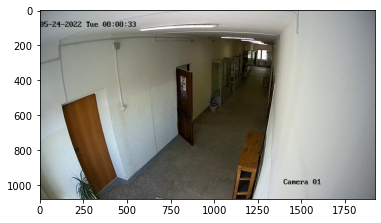

In [2]:
vs = cv2.VideoCapture("train1.mkv")

ret, frame = vs.read()

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

# Вырежем отметку времени (ее и будем распозновать 1 раз в секунду на видео)

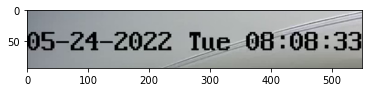

In [3]:
cropped_image = frame[30:125, 0:550]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

# В данном блоке указаны символы, которые необходимо распознать в дате

In [4]:
NUMBER = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
ALPHABET = [
    'u', 'n', 'o', 'e', 'd', 'h', 'r', 'i',
    '-', ':', ' ',
    'S', 'M', 'T', 'W', 'F'
]
ALL_CHAR_SET = NUMBER + ALPHABET
ALL_CHAR_SET_LEN = len(ALL_CHAR_SET)
MAX_CAPTCHA = 23

# Функция которая возвращает дату в текстовом виде из предсказания

In [5]:
def get_pred(pred):
    c0  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[0:ALL_CHAR_SET_LEN])]
    c1  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN:ALL_CHAR_SET_LEN*2])]
    c2  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*2:ALL_CHAR_SET_LEN*3])]
    c3  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*3:ALL_CHAR_SET_LEN*4])]
    c4  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*4:ALL_CHAR_SET_LEN*5])]
    c5  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*5:ALL_CHAR_SET_LEN*6])]
    c6  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*6:ALL_CHAR_SET_LEN*7])]
    c7  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*7:ALL_CHAR_SET_LEN*8])]
    c8  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*8:ALL_CHAR_SET_LEN*9])]
    c9  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*9:ALL_CHAR_SET_LEN*10])]
    c10 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*10:ALL_CHAR_SET_LEN*11])]
    c11 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*11:ALL_CHAR_SET_LEN*12])]
    c12 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*12:ALL_CHAR_SET_LEN*13])]
    c13 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*13:ALL_CHAR_SET_LEN*14])]
    c14 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*14:ALL_CHAR_SET_LEN*15])]
    c15 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*15:ALL_CHAR_SET_LEN*16])]
    c16 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*16:ALL_CHAR_SET_LEN*17])]
    c17 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*17:ALL_CHAR_SET_LEN*18])]
    c18 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*18:ALL_CHAR_SET_LEN*19])]
    c19 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*19:ALL_CHAR_SET_LEN*20])]
    c20 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*20:ALL_CHAR_SET_LEN*21])]
    c21 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*21:ALL_CHAR_SET_LEN*22])]
    c22 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*22:ALL_CHAR_SET_LEN*23])]
  
    c = '%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s' % (
        c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11,
        c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, 
    )
    return(c)

# Изменение размеров блока отметки времени

In [6]:
transform = transforms.Compose([
    transforms.Resize([128, 512]),
    transforms.ToTensor(),
])

# Так будут выглядеть изображения в тесте и предсказании (вырезаем отметку времени,  часть стены справа)

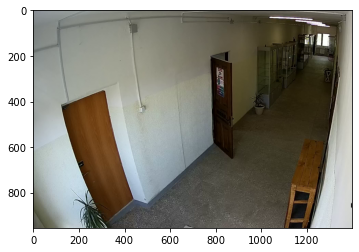

In [7]:
cropped_image = frame[125:, 0:1400]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

# Служебный блок (пересоздаем каталог, конвертируем дату время в соотвестствии с видеофайлом)

In [8]:
# удалить и создать каталог
import shutil
import os

dtrain = pd.read_csv('train.csv')

path = './train_image/'
if not os.path.exists(path):
    os.makedirs(path)
else:
    shutil.rmtree(path)
    os.makedirs(path)
    
def convert_date(x):
    out = ''
    x2 = x.split(' ')
    x0 = x2[0]
    x0 = x0.split('-')
    out = x0[1] + '-' + x0[2]+'-'+ x0[0] + ' ' + x2[1]
    return out

dtrain['datex'] = dtrain['date'].apply(lambda x: convert_date(x))
dtrain['image'] = ''
dtrain.head()

,id,date,employee,action,datex,image
0,1256,2022-05-24 08:08:36,2,15.0,05-24-2022 08:08:36,
1,1257,2022-05-24 08:08:37,2,4.0,05-24-2022 08:08:37,
2,1258,2022-05-24 08:12:13,3,15.0,05-24-2022 08:12:13,
3,1259,2022-05-24 08:12:25,3,2.0,05-24-2022 08:12:25,
4,1260,2022-05-24 08:12:42,3,12.0,05-24-2022 08:12:42,


# Загружаем модель и начинаем перебор видеофайла с интервалом в 1 сек. 
# Каждую секунду распознаем дату-время, и если дата-время есть в файле train.csv, сохраняем снимок экрана в папку "./train_image/".
# Так же сохраняем файл "01-train_image1.csv", в котором содержится соотвествующее имя файла изображения.

In [9]:
model = torch.load('01-train_model.pth')
second = 0
end = True

while end:
    
    try:
    
        key = second * 1000    
        vs.set(cv2.CAP_PROP_POS_MSEC, key)
        ret, frame = vs.read()
    
        img = frame[30:125, 0:550]
    
        PIL_image = Image.fromarray(np.uint8(img)).convert('RGB')
        PIL_image = PIL_image.convert('L')
    
        imgs = transform(PIL_image)
        imgs = Variable(imgs).cuda()
        pred = model(imgs.unsqueeze(0))
        c = get_pred(pred)
        c = c.replace(' Sun ', ' ')
        c = c.replace(' Mon ', ' ')
        c = c.replace(' Tue ', ' ')
        c = c.replace(' Wed ', ' ')
        c = c.replace(' Thu ', ' ')
    
        if c in dtrain['datex'].unique():
            ret, frame = vs.read()
            frame = frame[125:, 0:1400]
            print(c)
            img_name = c.replace(':',"_").replace(' ',"_")        
            img_name = "{}.png".format(img_name)
            idx = dtrain[dtrain['datex'] == c].index
            dtrain.loc[idx, 'image'] = img_name
            
            if second % 100 == 0:
                dtrain.to_csv('01-train_image1.csv', index  = False)
        
            cv2.imwrite(path + img_name, frame)
    
    
        second += 1
        
    except:
        end = False
    
dtrain.to_csv('01-train_image1.csv', index  = False)

05-24-2022 08:08:36
05-24-2022 08:08:37
05-24-2022 08:12:13
05-24-2022 08:12:25
05-24-2022 08:12:42
05-24-2022 08:12:50
05-24-2022 08:12:58
05-24-2022 08:13:08
05-24-2022 08:14:06
05-24-2022 08:14:20
05-24-2022 08:14:22
05-24-2022 08:14:31
05-24-2022 08:16:26
05-24-2022 08:16:36
05-24-2022 08:18:13
05-24-2022 08:18:24
05-24-2022 08:23:56
05-24-2022 08:23:59
05-24-2022 08:44:34
05-24-2022 08:44:35
05-24-2022 08:50:40
05-24-2022 08:51:07
05-24-2022 08:51:08
05-24-2022 08:51:10
05-24-2022 08:51:21
05-24-2022 08:51:23
05-24-2022 08:51:48
05-24-2022 08:52:02
05-24-2022 08:54:10
05-24-2022 08:54:11
05-24-2022 08:56:18
05-24-2022 08:56:20
05-24-2022 08:56:34
05-24-2022 08:56:36
05-24-2022 08:56:56
05-24-2022 08:56:59
05-24-2022 09:03:19
05-24-2022 09:03:23
05-24-2022 09:03:35
05-24-2022 09:16:40
05-24-2022 09:16:51
05-24-2022 09:17:04
05-24-2022 09:17:15
05-24-2022 09:21:28
05-24-2022 09:21:46
05-24-2022 09:23:20
05-24-2022 09:23:24
05-24-2022 09:23:33
05-24-2022 09:23:39
05-24-2022 09:23:44


05-24-2022 16:26:25
05-24-2022 16:26:28
05-24-2022 16:26:40
05-24-2022 16:26:48
05-24-2022 16:30:26
05-24-2022 16:30:53
05-24-2022 16:31:18
05-24-2022 16:31:43
05-24-2022 16:31:45
05-24-2022 16:31:49
05-24-2022 16:31:56
05-24-2022 16:31:57
05-24-2022 16:31:59
05-24-2022 16:32:03
05-24-2022 16:32:10
05-24-2022 16:32:15
05-24-2022 16:32:21
05-24-2022 16:32:33
05-24-2022 16:33:15
05-24-2022 16:33:25
05-24-2022 16:33:26
05-24-2022 16:33:38
05-24-2022 16:33:53
05-24-2022 16:33:54
05-24-2022 16:50:26
05-24-2022 16:50:28
05-24-2022 16:50:33
05-24-2022 16:50:56
05-24-2022 16:50:57
05-24-2022 16:50:58
05-24-2022 16:59:56
05-24-2022 17:00:10
05-24-2022 17:02:20
05-24-2022 17:02:33
05-24-2022 17:28:57
05-24-2022 17:29:08
05-24-2022 17:29:11
05-24-2022 17:29:23
05-24-2022 18:45:56
05-24-2022 18:46:14
05-24-2022 18:46:27
05-24-2022 18:46:33
05-24-2022 18:47:35
05-24-2022 18:47:42
05-24-2022 18:48:36
05-24-2022 18:48:47
05-24-2022 18:49:02
05-24-2022 18:49:14
05-24-2022 18:49:21
05-24-2022 18:49:41


05-25-2022 13:16:03
05-25-2022 13:16:48
05-25-2022 13:16:50
05-25-2022 13:17:04
05-25-2022 13:17:16
05-25-2022 13:18:32
05-25-2022 13:18:35
05-25-2022 13:18:54
05-25-2022 13:19:19
05-25-2022 13:21:22
05-25-2022 13:21:37
05-25-2022 13:24:59
05-25-2022 13:25:15
05-25-2022 13:31:52
05-25-2022 13:32:07
05-25-2022 13:55:28
05-25-2022 13:55:31
05-25-2022 14:03:26
05-25-2022 14:03:28
05-25-2022 14:09:08
05-25-2022 14:09:17
05-25-2022 14:10:37
05-25-2022 14:10:47
05-25-2022 14:10:59
05-25-2022 14:11:02
05-25-2022 14:11:13
05-25-2022 14:11:14
05-25-2022 14:11:32
05-25-2022 14:11:38
05-25-2022 14:13:15
05-25-2022 14:13:17
05-25-2022 14:13:21
05-25-2022 14:22:14
05-25-2022 14:22:18
05-25-2022 14:22:20
05-25-2022 14:22:36
05-25-2022 14:23:14
05-25-2022 14:23:26
05-25-2022 14:24:23
05-25-2022 14:24:43
05-25-2022 14:38:12
05-25-2022 14:38:15
05-25-2022 14:40:00
05-25-2022 14:40:02
05-25-2022 14:40:31
05-25-2022 14:40:37
05-25-2022 14:41:00
05-25-2022 14:41:01
05-25-2022 14:41:53
05-25-2022 14:41:56


In [10]:
dtrain.to_csv('01-train_image1.csv', index  = False)
dtrain.head()

,id,date,employee,action,datex,image
0,1256,2022-05-24 08:08:36,2,15.0,05-24-2022 08:08:36,05-24-2022_08_08_36.png
1,1257,2022-05-24 08:08:37,2,4.0,05-24-2022 08:08:37,05-24-2022_08_08_37.png
2,1258,2022-05-24 08:12:13,3,15.0,05-24-2022 08:12:13,05-24-2022_08_12_13.png
3,1259,2022-05-24 08:12:25,3,2.0,05-24-2022 08:12:25,05-24-2022_08_12_25.png
4,1260,2022-05-24 08:12:42,3,12.0,05-24-2022 08:12:42,05-24-2022_08_12_42.png


https://lk.hacks-ai.ru/758261/champ